In [177]:
# Perspective Transform and Polyfit

import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

%matplotlib inline

In [196]:
# Un-pickle camera calibration
cam_cal = pickle.load(open('cam_calibration.p','rb'))
dist = cam_cal['dist']
mtx = cam_cal['mtx']

In [197]:
def warper(undist, src, dst):
    y, x = undist.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, (x, y), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

In [198]:
image_paths = glob.glob('test_images/test*.jpg')
images = []
for path in image_paths:
    images.append(cv2.imread(path))
    
y, x = images[0].shape[:2]

In [199]:
src = np.float32([(575,465),
                 (750,465), 
                 (260,680), 
                 (1100,680)])
dst = np.float32([(200,0),
                 (x-200,0),
                 (200,y),
                 (x-200,y)])
# offset = 400
# dst = np.float32([
#     [offset, 0],
#     [x-offset, 0],
#     [x-offset, y], 
#     [x, y]])
# offset = 200
# src = np.float32([
#     [  588,   446 ],
#     [  691,   446 ],
#     [ 1126,   673 ],
#     [  153 ,   673 ]])
# dst = np.float32([[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

In [191]:
xSize, ySize, _ = images[0].shape
copy = undist.copy()

bottomY = 720
topY = 455


left1 = (190, bottomY)
left2 = (585, topY)
left2_x, left2_y = left2

right1 = (705, topY)
right1_x, right1_y = right1

right2 = (1130, bottomY)
right2_x, right2_y = right2
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
src = np.float32([ 
    [left2_x, left2_y],
    [right1_x, right1_y],
    [right2_x, right2_y],
    [left1_x, left1_y]
])
nX = gray.shape[1]
nY = gray.shape[0]
img_size = (nX, nY)
offset = 200
dst = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
])

In [200]:
undist = cv2.undistort(cv2.cvtColor(images[5], cv2.COLOR_BGR2RGB), mtx, dist, None, mtx)
warped, M, Minv = warper(undist, src, dst)

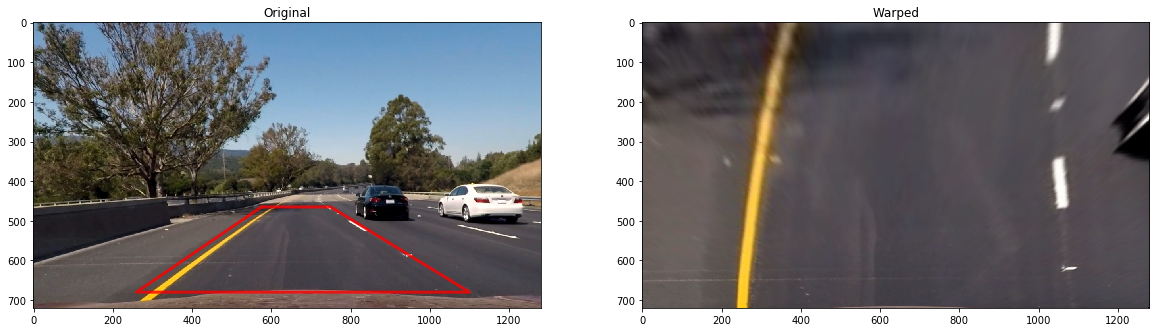

In [202]:
x_pts = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y_pts = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(undist)
ax[0].set_title('Original')
ax[0].plot(x_pts, y_pts, color='red', alpha=0.8, linewidth=3, solid_capstyle='round')
ax[1].imshow(warped)
ax[1].set_title('Warped')

In [203]:
# Save perspective transform in pickle
perspective_pickle = {}
perspective_pickle['M'] = M
perspective_pickle['Minv'] = Minv
pickle.dump( perspective_pickle, open( 'perspective_transform.p', 'wb' ) )